# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [195]:
data = pd.read_csv('train.csv')

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [196]:
split = int(len(data) * 0.7)
train_data, test_data = data.iloc[:split], data.iloc[split:]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [197]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [198]:
train_data, test_data = get_features_and_target(train_data), get_features_and_target(test_data)
train_data, train_target = train_data
test_data, test_target = test_data

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

In [199]:
# объединим с таргетом для упрощения кода - можно делать groupby у pandas
df = train_data.copy()
df['target'] = train_target

Очевидная гипотеза состоит в том, что больше спасали женщин и детей. Проверим это для женщин.

In [200]:
df.groupby(by=['Sex'])['target'].mean()

Sex
female    0.748918
male      0.186224
Name: target, dtype: float64

Далее, для более качественного анализа будем рассматривать все для разных полов отдельно.

Посмотрим, как на выживаемость влиял класс, в котором ехал пассажир.

In [201]:
p_class_grouped = df.groupby(by=['Sex', 'Pclass'])['target'].mean() * 100 # умножили для получения процента

Text(0.5, 1.0, 'Зависимость выживаемости от класса')

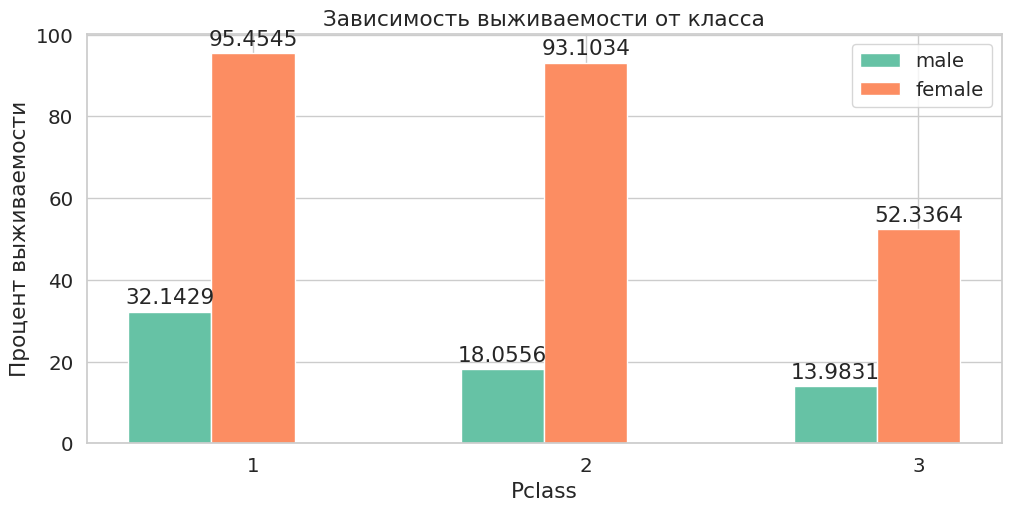

In [202]:
p_classes = [1, 2, 3]
x = np.arange(3)
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))
for sex in ['male', 'female']:
    offset = width * multiplier
    rects = ax.bar(x + offset, p_class_grouped[sex].values, width, label=sex)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x + width, p_classes)
ax.legend()
ax.set_ylabel('Процент выживаемости')
ax.set_xlabel('Pclass')
ax.set_title('Зависимость выживаемости от класса')

Видно, что чем выше класс, тем больше выживаемость пассажиров. Тенденция наблюдается и для мужчин, и для женщин.

Теперь посмотрим, как на выживаемость влиял возраст пассажиров. Отметим, что в нем около 20 процентов пропусков для каждого класса.

In [203]:
df.drop(['Sex'], axis=1).isna().groupby(by=df['Sex']).mean()['Age']

Sex
female    0.190476
male      0.221939
Name: Age, dtype: float64

Проведем исследования по группам.

In [204]:
kid = 16
adult = 50

df['Age'] = df['Age'].fillna(1000).apply(lambda x:
                'NaN' if x == 1000 else
                'kid' if x < kid else
                'adult' if x < adult else
                'old')

Text(0.5, 1.0, 'Зависимость выживаемости от возраста')

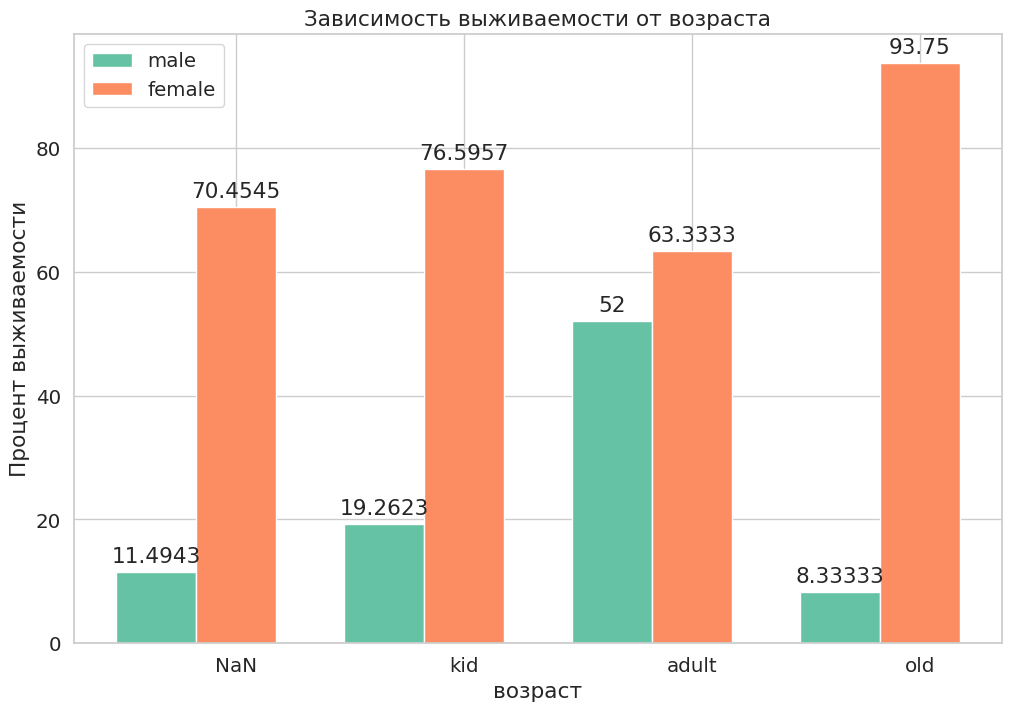

In [206]:
age_grouped = df.groupby(by=['Sex', 'Age'])['target'].mean() * 100
classes = ['NaN', 'kid', 'adult', 'old']
x = np.arange(4)
width = 0.35
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 7))
for sex in ['male', 'female']:
    offset = width * multiplier
    rects = ax.bar(x + offset, age_grouped[sex].values, width, label=sex)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_xticks(x + width, classes)
ax.legend()
ax.set_ylabel('Процент выживаемости')
ax.set_xlabel('возраст')
ax.set_title('Зависимость выживаемости от возраста')

Как мы видим, самая большая выживаемость среди женщин у детей и пожилых. Среди мужчин наоборот - у молодых.

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [221]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных. [n, d]
    на основе обучающего набора данных train_features, train_target. [m, d], [m]
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    lengths = ((features.to_numpy()[:, np.newaxis,:] - train_features.to_numpy()) ** 2).sum(axis=2) # [n:m]
    nearest_labels = np.take(train_target.to_numpy(), nearest) # [n:k]
    predicted = np.mean(nearest_labels, axis=1)
    return pd.Series(predicted, features.index) > 0.5

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Функция расстояния используется обычная евклидова. Признаки нужно отнормировать, т.к. возраст и цена измеряются в разных шкалах.

In [ ]:
features = train_data[['Age', 'Fare']]

for column in features.columns:
    features[column] = features[column]  / features[column].abs().max()

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [224]:
ks = [3, 5, 7]

for k in ks:
  predicted = knn(features, features, train_target, k=k)
  print(f'k = {k}, accurace = {(predicted == train_target).mean()}')

(623, 3)
k = 3, accurace = 0.7752808988764045
(623, 5)
k = 5, accurace = 0.7174959871589085
(623, 7)
k = 7, accurace = 0.7030497592295345


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

Другие признаки - классовые, а не численные. Можно было бы применить one-hot кодирование или сделать осмысленное ранжирование. Например Pclass - классовый, но уже "приведен" в численное осмысленное ранжирование.

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

- Пол пассажира
  - Мужчина -> 0
  - Женщина -> 1

**Дерево 2:**

- пол пассажира
  - Мужчина
    - возраст в [16, 50] -> 1
    - иначе -> 0
  - Женщина
    - 1

Реализуйте полученные деревья по шаблону

In [231]:
def tree1(features):
    return features['Sex'] == 'female'

def tree2(features):
    return (features['Sex'] == 'female') | ((features['Sex'] == 'male') & (features['Age'] > 16) & (features['Age'] < 50))

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

В задачах подобной нашей возможно неравномерное распределение меток классов. В случае, если погибших сильно больше выживших. Имеет смысл использовать средневзвешенную точность.

Реализуйте данный критерий по шаблону

In [226]:
def criteria(target, predicted):
  true_target = (target == 1)
  false_target = ~ true_target
  true_accuracy = (target[true_target] == predicted[true_target]).mean()
  false_accuracy = (target[false_target] == predicted[false_target]).mean()
  return (true_accuracy + false_accuracy) / 2

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [232]:
print(criteria(tree1(test_data), test_target))
print(criteria(tree2(test_data), test_target))

0.7641484858352328
0.5739795918367347


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

Глобальные выводы - на корабле пытались спасать больше женщин. Причем предпочтение отдавалось детям и старым. Среди мужчин больше выживало молодых, что можно объяснить лучшей физической подготовкой.

По моделям - простое дерево по одному признаку показало себя лучше сложного.